# 라이브러리 설치 및 불러오기

In [ ]:
!pip3 install gradio

In [2]:
import gradio as gr
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import colorsys
from skimage.color import rgb2lab
import os
import cv2

# LAB

In [ ]:
warm_tone = [63.45, 11.80, 17.11] # 웜 [66.65, 6.02, 20.97] -> 120 논문으로 바꿈
cool_tone = [66.65, 11.695, 13.805] # 쿨

In [ ]:
def rgb_to_lab(rgb):
    lab = rgb2lab([[rgb / 255.0]])[0][0]
    return lab[0], lab[1], lab[2]

def zero_shot_classification(color_vector):
    lab_color = rgb_to_lab(np.array(color_vector).astype(np.float32))

    warm_similarity = np.linalg.norm(lab_color - np.array(warm_tone).astype(np.float32))
    cool_similarity = np.linalg.norm(lab_color - np.array(cool_tone).astype(np.float32))

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [ ]:
def classify_image(image):
    image = image.astype(np.float32) / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color.astype(np.float32))
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [ ]:
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

<ipython-input-17-594e00687ca2>:1: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4bf53dc6532c8178c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


- 웜 구분이 잘 안됨
- 웜 분류를 전에 120p 논문의 값으로 대체하자 이번엔 웜이 우세하게 나온다.
- 다만, gradio 에러가 너무 자주 뜨는데 그 이유를 찾지 못하였다.

---
## 함수를 바꿔보려는 시도들

In [ ]:
def image_to_lab(image):
    # Convert image to LAB color space
    imgage = cv2.imread(image) # 함수로 값 반환하려면
    image_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    # Access the L, a, b channels of the LAB image
    L = image_lab[:, :, 0]
    a = image_lab[:, :, 1]
    b = image_lab[:, :, 2]

    return L, a, b

In [ ]:
# def rgb_to_lab(rgb):
#     lab = rgb2lab([[rgb / 255.0]])[0][0]
#     return lab[0], lab[1], lab[2]

def zero_shot_classification(color_vector):
    lab_color = image_to_lab(np.array(color_vector).astype(np.float32))

    warm_similarity = np.linalg.norm(lab_color - np.array(warm_tone).astype(np.float32))
    cool_similarity = np.linalg.norm(lab_color - np.array(cool_tone).astype(np.float32))

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [ ]:
def classify_image(image):
    image = image.astype(np.float32) / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color.astype(np.float32))
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [ ]:
img1 = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/공효진.jpg'
classify_image(img1)

AttributeError: ignored

In [ ]:
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

<ipython-input-22-594e00687ca2>:1: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cab3dd1597ed459e53.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


---

In [ ]:
warm_tone = [63.45, 11.80, 17.11]   # 웜 (논문 값, 빨간색과는 b값이 차이가 큼)
cool_tone = [64.80, 10.87, 15.04] # 쿨 (논문 값,L,a, b값 차이 모두 큼 - 약 50)

In [ ]:
def rgb_to_lab(rgb):
    lab = rgb2lab([[rgb / 255.0]])[0][0]
    return lab[0], lab[1], lab[2]

def zero_shot_classification(color_vector):
    lab_color = rgb_to_lab(np.array(color_vector).astype(np.float32))

    warm_similarity = np.linalg.norm(lab_color - np.array(warm_tone).astype(np.float32))
    cool_similarity = np.linalg.norm(lab_color - np.array(cool_tone).astype(np.float32))

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [ ]:
def classify_image(image):
    image = image.astype(np.float32) / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color.astype(np.float32))
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [ ]:
img = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/공효진.jpg'
classify_image(img)

AttributeError: ignored

In [ ]:
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

---

In [ ]:
warm_tone = [63.45, 11.80, 17.11]
cool_tone = [64.80, 10.87, 15.04]

In [ ]:
import cv2
import numpy as np

def convert_image_to_lab(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    return l_channel, a_channel, b_channel

In [ ]:
def classify_lab(image_path):
    # Convert the image to LAB color space
    l, a, b = convert_image_to_lab(image_path)

    # Define warm-tone and cool-tone criteria
    warm_tone = [63.45, 11.80, 17.11]
    cool_tone = [64.80, 10.87, 15.04]

    # Calculate Euclidean distance between LAB values and warm/cool tones
    warm_distance = np.sqrt((l - warm_tone[0]) ** 2 + (a - warm_tone[1]) ** 2 + (b - warm_tone[2]) ** 2)
    cool_distance = np.sqrt((l - cool_tone[0]) ** 2 + (a - cool_tone[1]) ** 2 + (b - cool_tone[2]) ** 2)

    # Classify based on the minimum distance
    if warm_distance < cool_distance:
        return "Warm Tone"
    else:
        return "Cool Tone"

# Example usage
image_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/공효진.jpg"
classification = classify_lab(image_path)

print("Image classification:", classification)

---

In [ ]:
import cv2
import numpy as np

def convert_image_to_lab(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)

    # 이미지를 LAB 색 공간으로 변환
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # LAB 이미지를 L, A, B 채널로 분할
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    return l_channel, a_channel, b_channel

def classify_lab(image_path):
    # 이미지를 LAB 색 공간으로 변환
    l, a, b = convert_image_to_lab(image_path)

    # 따뜻한 톤과 차가운 톤의 기준 정의
    warm_tone = [63.45, 11.80, 17.11]
    cool_tone = [64.80, 10.87, 15.04]

    # LAB 값과 따뜻한/차가운 톤의 유클리드 거리 계산
    warm_distance = np.sqrt((l - warm_tone[0]) ** 2 + (a - warm_tone[1]) ** 2 + (b - warm_tone[2]) ** 2)
    cool_distance = np.sqrt((l - cool_tone[0]) ** 2 + (a - cool_tone[1]) ** 2 + (b - cool_tone[2]) ** 2)

    # 최소 거리를 기준으로 분류
    if np.any(warm_distance < cool_distance):
        return "웜톤"
    else:
        return "쿨톤"

# 사용 예시
image_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/쿨/이영애.jpg"
classification = classify_lab(image_path)

print("이미지 분류:", classification)


이미지 분류: 웜톤


In [ ]:
def zero_shot_classification(color_vector):
    lab_color = image_to_lab(np.array(color_vector).astype(np.float32))

    warm_similarity = np.linalg.norm(lab_color - np.array(warm_tone).astype(np.float32))
    cool_similarity = np.linalg.norm(lab_color - np.array(cool_tone).astype(np.float32))

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [ ]:
def classify_images(image_paths):
    results = []

    for image_path in image_paths:
        classification = classify_lab(image_path)
        results.append(classification)

    return results

# Example usage with a list of 100 image paths
image_paths = [
    "image_path_1.jpg",
    "image_path_2.jpg",
    # Add more image paths here...
    "image_path_100.jpg"
]

classification_results = classify_images(image_paths)

# Print the classification results
for i, result in enumerate(classification_results):
    print("Image", i+1, "classification:", result)


# RGB

## 1.연예인 사진 원본이미지

In [ ]:
spring_tone = [253.75, 153.55, 152]
summer_tone = [254, 291.25, 164.5]
fall_tone = [240.75, 199.25, 132.75]
winter_tone = [240, 201.5, 129.5]

def zero_shot_classification(color_vector):
    spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
    summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
    fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
    winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))

    if spring_similarity > summer_similarity and spring_similarity > fall_similarity and spring_similarity > winter_similarity:
        return "봄 웜톤"
    elif summer_similarity > spring_similarity and summer_similarity > fall_similarity and summer_similarity > winter_similarity:
        return "여름 쿨톤"
    elif fall_similarity > spring_similarity and fall_similarity > summer_similarity and fall_similarity > winter_similarity:
        return "가을 웜톤"
    else:
        return "겨울 쿨톤"


In [ ]:
def classify_image(image):
    image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    all_color = f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

    return all_color

In [ ]:
# 함수 정의
def process_file(file_path):
    result = classify_image(file_path)
    return result

# 웜 이미지 결과확인
warm_file_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜"

file_results_warm = {}

for filename in os.listdir(warm_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(warm_file_path, filename)
        result = process_file(file_path)
        file_results_warm[filename] = result

# 결과 출력
for filename, result in file_results_warm.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 한지민.jpg: 봄 웜톤: 28.99%
여름 쿨톤: 67.26%
가을 웜톤: 3.60%
겨울 쿨톤: 0.14%
Result for file 수지.jpg: 봄 웜톤: 19.74%
여름 쿨톤: 80.05%
가을 웜톤: 0.21%
겨울 쿨톤: 0.00%
Result for file 장나라.jpg: 봄 웜톤: 1.16%
여름 쿨톤: 96.26%
가을 웜톤: 2.58%
겨울 쿨톤: 0.00%
Result for file 송혜교.jpg: 봄 웜톤: 3.89%
여름 쿨톤: 91.64%
가을 웜톤: 4.48%
겨울 쿨톤: 0.00%
Result for file 제니.jpg: 봄 웜톤: 17.30%
여름 쿨톤: 77.27%
가을 웜톤: 4.53%
겨울 쿨톤: 0.90%
Result for file 김유정.jpg: 봄 웜톤: 1.70%
여름 쿨톤: 96.33%
가을 웜톤: 1.89%
겨울 쿨톤: 0.08%
Result for file 아이유.jpg: 봄 웜톤: 4.02%
여름 쿨톤: 91.26%
가을 웜톤: 4.66%
겨울 쿨톤: 0.06%
Result for file 수애.jpg: 봄 웜톤: 21.34%
여름 쿨톤: 75.07%
가을 웜톤: 3.17%
겨울 쿨톤: 0.43%
Result for file 전지현.jpg: 봄 웜톤: 34.23%
여름 쿨톤: 64.42%
가을 웜톤: 1.35%
겨울 쿨톤: 0.00%
Result for file 한예슬.jpg: 봄 웜톤: 35.92%
여름 쿨톤: 56.64%
가을 웜톤: 7.29%
겨울 쿨톤: 0.15%
Result for file 신세경.jpg: 봄 웜톤: 10.72%
여름 쿨톤: 89.18%
가을 웜톤: 0.09%
겨울 쿨톤: 0.01%
Result for file 문가영.jpg: 봄 웜톤: 34.86%
여름 쿨톤: 45.34%
가을 웜톤: 19.80%
겨울 쿨톤: 0.01%
Result for file 박신ᄒ

In [ ]:
# 쿨 이미지 결과확인
cool_file_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/쿨"

file_results_cool = {}

for filename in os.listdir(cool_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(cool_file_path, filename)
        result = process_file(file_path)
        file_results_cool[filename] = result

# 결과 출력
for filename, result in file_results_cool.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 문채원.jpg: 봄 웜톤: 12.45%
여름 쿨톤: 87.44%
가을 웜톤: 0.10%
겨울 쿨톤: 0.00%
Result for file 손예진.jpg: 봄 웜톤: 8.81%
여름 쿨톤: 78.85%
가을 웜톤: 12.32%
겨울 쿨톤: 0.02%
Result for file 카리나.jpg: 봄 웜톤: 8.36%
여름 쿨톤: 90.22%
가을 웜톤: 1.41%
겨울 쿨톤: 0.01%
Result for file 김혜수.jpg: 봄 웜톤: 4.92%
여름 쿨톤: 81.31%
가을 웜톤: 9.28%
겨울 쿨톤: 4.49%
Result for file 이영애.jpg: 봄 웜톤: 39.58%
여름 쿨톤: 48.79%
가을 웜톤: 11.60%
겨울 쿨톤: 0.02%
Result for file 김고은.jpg: 봄 웜톤: 28.00%
여름 쿨톤: 48.55%
가을 웜톤: 23.06%
겨울 쿨톤: 0.39%
Result for file 김태리.jpg: 봄 웜톤: 16.02%
여름 쿨톤: 31.82%
가을 웜톤: 52.09%
겨울 쿨톤: 0.07%
Result for file 장원영.jpg: 봄 웜톤: 7.27%
여름 쿨톤: 92.72%
가을 웜톤: 0.01%
겨울 쿨톤: 0.00%
Result for file 김사랑.jpg: 봄 웜톤: 4.57%
여름 쿨톤: 95.28%
가을 웜톤: 0.15%
겨울 쿨톤: 0.00%
Result for file 지수.jpg: 봄 웜톤: 39.99%
여름 쿨톤: 47.47%
가을 웜톤: 11.73%
겨울 쿨톤: 0.82%
Result for file 아이린.jpg: 봄 웜톤: 4.02%
여름 쿨톤: 95.41%
가을 웜톤: 0.49%
겨울 쿨톤: 0.08%
Result for file 판빙빙.jpeg: 봄 웜톤: 9.26%
여름 쿨톤: 76.90%
가을 웜톤: 11.98%
겨울 쿨톤: 1.86%
Result for f

---
### 이미지 사이즈 지정

In [ ]:
def classify_image_1(image, size):
    image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = cv2.resize(image, (size, size))
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    all_color = f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

    return all_color

In [ ]:
def process_file_size(file_path, size):
    result = classify_image_1(file_path, size)
    return result

## 웜톤image size = (224,224)
file_results_warm_1 = {}

for filename in os.listdir(warm_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(warm_file_path, filename)
        result = process_file_size(file_path, 224)
        file_results_warm_1[filename] = result

# 결과 출력
for filename, result in file_results_warm_1.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 한지민.jpg: 봄 웜톤: 29.11%
여름 쿨톤: 67.17%
가을 웜톤: 3.57%
겨울 쿨톤: 0.15%
Result for file 수지.jpg: 봄 웜톤: 19.62%
여름 쿨톤: 80.18%
가을 웜톤: 0.19%
겨울 쿨톤: 0.00%
Result for file 장나라.jpg: 봄 웜톤: 1.15%
여름 쿨톤: 96.31%
가을 웜톤: 2.54%
겨울 쿨톤: 0.00%
Result for file 송혜교.jpg: 봄 웜톤: 3.84%
여름 쿨톤: 91.72%
가을 웜톤: 4.44%
겨울 쿨톤: 0.00%
Result for file 제니.jpg: 봄 웜톤: 17.27%
여름 쿨톤: 77.31%
가을 웜톤: 4.53%
겨울 쿨톤: 0.89%
Result for file 김유정.jpg: 봄 웜톤: 1.63%
여름 쿨톤: 96.43%
가을 웜톤: 1.87%
겨울 쿨톤: 0.07%
Result for file 아이유.jpg: 봄 웜톤: 3.86%
여름 쿨톤: 91.44%
가을 웜톤: 4.66%
겨울 쿨톤: 0.04%
Result for file 수애.jpg: 봄 웜톤: 21.15%
여름 쿨톤: 75.38%
가을 웜톤: 3.09%
겨울 쿨톤: 0.37%
Result for file 전지현.jpg: 봄 웜톤: 34.17%
여름 쿨톤: 64.49%
가을 웜톤: 1.34%
겨울 쿨톤: 0.00%
Result for file 한예슬.jpg: 봄 웜톤: 35.80%
여름 쿨톤: 56.71%
가을 웜톤: 7.37%
겨울 쿨톤: 0.12%
Result for file 신세경.jpg: 봄 웜톤: 10.65%
여름 쿨톤: 89.25%
가을 웜톤: 0.10%
겨울 쿨톤: 0.00%
Result for file 문가영.jpg: 봄 웜톤: 34.81%
여름 쿨톤: 44.92%
가을 웜톤: 20.27%
겨울 쿨톤: 0.00%
Result for file 박신ᄒ

In [ ]:
## 웜톤 image size = (32, 32)
file_results_warm_2 = {}

for filename in os.listdir(warm_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(warm_file_path, filename)
        result = process_file_size(file_path, 32)
        file_results_warm_2[filename] = result

# 결과 출력
for filename, result in file_results_warm_2.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 한지민.jpg: 봄 웜톤: 28.91%
여름 쿨톤: 67.58%
가을 웜톤: 3.52%
겨울 쿨톤: 0.00%
Result for file 수지.jpg: 봄 웜톤: 19.73%
여름 쿨톤: 80.18%
가을 웜톤: 0.10%
겨울 쿨톤: 0.00%
Result for file 장나라.jpg: 봄 웜톤: 0.88%
여름 쿨톤: 96.88%
가을 웜톤: 2.25%
겨울 쿨톤: 0.00%
Result for file 송혜교.jpg: 봄 웜톤: 4.20%
여름 쿨톤: 91.70%
가을 웜톤: 4.10%
겨울 쿨톤: 0.00%
Result for file 제니.jpg: 봄 웜톤: 17.38%
여름 쿨톤: 77.25%
가을 웜톤: 4.49%
겨울 쿨톤: 0.88%
Result for file 김유정.jpg: 봄 웜톤: 1.56%
여름 쿨톤: 96.58%
가을 웜톤: 1.76%
겨울 쿨톤: 0.10%
Result for file 아이유.jpg: 봄 웜톤: 3.81%
여름 쿨톤: 91.50%
가을 웜톤: 4.59%
겨울 쿨톤: 0.10%
Result for file 수애.jpg: 봄 웜톤: 21.29%
여름 쿨톤: 74.90%
가을 웜톤: 3.22%
겨울 쿨톤: 0.59%
Result for file 전지현.jpg: 봄 웜톤: 33.30%
여름 쿨톤: 65.23%
가을 웜톤: 1.46%
겨울 쿨톤: 0.00%
Result for file 한예슬.jpg: 봄 웜톤: 36.43%
여름 쿨톤: 56.54%
가을 웜톤: 6.84%
겨울 쿨톤: 0.20%
Result for file 신세경.jpg: 봄 웜톤: 10.64%
여름 쿨톤: 89.26%
가을 웜톤: 0.00%
겨울 쿨톤: 0.10%
Result for file 문가영.jpg: 봄 웜톤: 35.94%
여름 쿨톤: 44.04%
가을 웜톤: 20.02%
겨울 쿨톤: 0.00%
Result for file 박신ᄒ

- 이미지 사이즈를 재 설정해서 진행했더니 결과 값은 크게 변하지 않았지만, 결과 반환 속도가 15배 증가했다.

In [ ]:
## 쿨톤 image size = (224, 224)
file_results_cool_1 = {}

for filename in os.listdir(cool_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(cool_file_path, filename)
        result = process_file_size(file_path, 224)
        file_results_cool_1[filename] = result

# 결과 출력
for filename, result in file_results_cool_1.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 문채원.jpg: 봄 웜톤: 12.36%
여름 쿨톤: 87.53%
가을 웜톤: 0.11%
겨울 쿨톤: 0.00%
Result for file 손예진.jpg: 봄 웜톤: 8.89%
여름 쿨톤: 78.75%
가을 웜톤: 12.34%
겨울 쿨톤: 0.02%
Result for file 카리나.jpg: 봄 웜톤: 8.32%
여름 쿨톤: 90.28%
가을 웜톤: 1.40%
겨울 쿨톤: 0.00%
Result for file 김혜수.jpg: 봄 웜톤: 4.87%
여름 쿨톤: 81.40%
가을 웜톤: 9.25%
겨울 쿨톤: 4.48%
Result for file 이영애.jpg: 봄 웜톤: 39.61%
여름 쿨톤: 48.82%
가을 웜톤: 11.55%
겨울 쿨톤: 0.02%
Result for file 김고은.jpg: 봄 웜톤: 27.87%
여름 쿨톤: 48.65%
가을 웜톤: 23.17%
겨울 쿨톤: 0.30%
Result for file 김태리.jpg: 봄 웜톤: 16.13%
여름 쿨톤: 31.54%
가을 웜톤: 52.28%
겨울 쿨톤: 0.05%
Result for file 장원영.jpg: 봄 웜톤: 7.11%
여름 쿨톤: 92.88%
가을 웜톤: 0.01%
겨울 쿨톤: 0.00%
Result for file 김사랑.jpg: 봄 웜톤: 4.48%
여름 쿨톤: 95.37%
가을 웜톤: 0.15%
겨울 쿨톤: 0.00%
Result for file 지수.jpg: 봄 웜톤: 39.95%
여름 쿨톤: 47.43%
가을 웜톤: 11.83%
겨울 쿨톤: 0.80%
Result for file 아이린.jpg: 봄 웜톤: 3.88%
여름 쿨톤: 95.54%
가을 웜톤: 0.53%
겨울 쿨톤: 0.05%
Result for file 판빙빙.jpeg: 봄 웜톤: 9.18%
여름 쿨톤: 77.06%
가을 웜톤: 11.99%
겨울 쿨톤: 1.76%
Result for f

In [ ]:
## 쿨톤 image size = (32, 32)
file_results_cool_2 = {}

for filename in os.listdir(cool_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(cool_file_path, filename)
        result = process_file_size(file_path, 32)
        file_results_cool_2[filename] = result

# 결과 출력
for filename, result in file_results_cool_2.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-3-b1eea71f62d2>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-3-b1eea71f62d2>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-3-b1eea71f62d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-3-b1eea71f62d2>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 문채원.jpg: 봄 웜톤: 12.40%
여름 쿨톤: 87.50%
가을 웜톤: 0.10%
겨울 쿨톤: 0.00%
Result for file 손예진.jpg: 봄 웜톤: 8.79%
여름 쿨톤: 78.22%
가을 웜톤: 12.99%
겨울 쿨톤: 0.00%
Result for file 카리나.jpg: 봄 웜톤: 8.40%
여름 쿨톤: 90.53%
가을 웜톤: 1.07%
겨울 쿨톤: 0.00%
Result for file 김혜수.jpg: 봄 웜톤: 5.08%
여름 쿨톤: 81.54%
가을 웜톤: 8.98%
겨울 쿨톤: 4.39%
Result for file 이영애.jpg: 봄 웜톤: 39.26%
여름 쿨톤: 48.93%
가을 웜톤: 11.72%
겨울 쿨톤: 0.10%
Result for file 김고은.jpg: 봄 웜톤: 26.95%
여름 쿨톤: 49.32%
가을 웜톤: 23.54%
겨울 쿨톤: 0.20%
Result for file 김태리.jpg: 봄 웜톤: 14.45%
여름 쿨톤: 32.62%
가을 웜톤: 52.93%
겨울 쿨톤: 0.00%
Result for file 장원영.jpg: 봄 웜톤: 6.54%
여름 쿨톤: 93.46%
가을 웜톤: 0.00%
겨울 쿨톤: 0.00%
Result for file 김사랑.jpg: 봄 웜톤: 4.88%
여름 쿨톤: 94.92%
가을 웜톤: 0.20%
겨울 쿨톤: 0.00%
Result for file 지수.jpg: 봄 웜톤: 40.23%
여름 쿨톤: 47.36%
가을 웜톤: 11.23%
겨울 쿨톤: 1.17%
Result for file 아이린.jpg: 봄 웜톤: 3.81%
여름 쿨톤: 95.80%
가을 웜톤: 0.39%
겨울 쿨톤: 0.00%
Result for file 판빙빙.jpeg: 봄 웜톤: 8.98%
여름 쿨톤: 76.95%
가을 웜톤: 12.30%
겨울 쿨톤: 1.76%
Result for f

- 제로샷으로 라벨 분류값이 매번 변해서 고민이다
- 데이터 사이즈를 변화시켜도 결과는 비슷하나 속도 상승 확인

---
### Gradio

In [ ]:
def gr_classify_image(image):
    # image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    return f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"


In [ ]:
# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=gr_classify_image,
    inputs="image",
    outputs="label",
    capture_session=True,
    title="봄여름가을겨울",
    description="사진을 업로드 하면 퍼스널컬러의 비율을 확인할 수 있습니다."
                      )

iface.launch(share=True)

- 웜 비율이 높음. 배경이나 머리색의 색일 수 있어서 이미지 전처리를 시도하면 정확도가 높아지지 않을까
- 갑자기 사진들이 오류가 난다. 왜지?
Unexpected token '<', "<html> <h"... is not valid JSON


___
### 성능 확인
- 실제 라벨 저장하고 제로샷 결과값 저장하여 성능지표 확인

In [ ]:
def classify_color_1(image):
    image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    personal_color = max(spring_tone_ratio, summer_tone_ratio, fall_tone_ratio, winter_tone_ratio)
    if personal_color == spring_tone_ratio:
       print ("웜")
    all_color = f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

    return personal_color

In [ ]:
warm_file_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜"
cool_file_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/쿨"

def process_file(file_path):
    result = classify_color_1(file_path)
    return result

file_results_warm_1 = {}
file_results_cool_1 = {}

for filename in os.listdir(cool_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(cool_file_path, filename)
        result = process_file(file_path)
        file_results_cool_1[filename] = result

# 결과 출력
for filename, result in file_results_cool_1.items():
    print(f"Result for file {filename}: {result}")

## 2.crop 이미지 넣기

## 3.skin detection

In [ ]:
def Skin_Detection(img_path, name):

  #Open a simple image
  img=cv2.imread(img_path)

  #converting from gbr to YCbCr color space
  img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  #skin color range for hsv color space
  YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
  YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

  YCrCb_result = cv2.bitwise_not(YCrCb_mask)

  # Extract the skin regions from the original image
  YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

  #show results
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/" + name + "_1_YCrCb_result.jpg",YCrCb_result)
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/" + name + "_2_img_YCrCb.jpg",img_YCrCb)
  # 6, 7, 8이 핵심 이미지들
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/" + name + "_3_YCrCb_skin_detected.jpg",YCrCb_skin_detected)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  return img_YCrCb, YCrCb_mask

In [ ]:
# skin 좌표 추출, YCrCb 픽셀값 추출
def coordinate_extraction(mask, img):
  skin = np.argwhere(mask == 255) # mask의 픽셀값이 255인 skin부분의 좌표 추출

  pixel_values = [] # YCbCr 픽셀값 저장을 위한 리스트

  for index in skin:
    y, x = index  #일반적으로 생각하는 가로 x, 세로 y로 표현하기 위해 위치 바꿈
    #print(f"x: {x}, y: {y}") # skin 범위 좌표값 출력(스압주의)
    pixel_value = img[y, x]
    pixel_values.append(pixel_value)

  for coord, pixel_value in zip(skin, pixel_values): # skin부분의 좌표값과 픽셀값 출력을 위한 함수
    x, y = coord
    #print(f"Coordinate: ({x}, {y}), Pixel Value: {pixel_value}")

  return pixel_values

In [ ]:
# 픽셀의 평균값 구하기
def pixel_means(pixel_values):
  # 열 별로 원소들을 더하기
  column_sums = np.sum(pixel_values, axis=0)

  # pixel_values를 NumPy 배열로 변환
  pixel_values = np.array(pixel_values)

  # 열 별로 평균 계산하기
  column_means = column_sums / pixel_values.shape[0]

  return column_means

In [ ]:
def get_dict(dir_path):
  file_list = os.listdir(dir_path)

  img_list = []
  result_list = []

  for file in file_list:
    img_path = os.path.join(dir_path, file)
    if os.path.isdir(img_path):  # 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어감
      continue
    file_name = file
    file_name = os.path.splitext(file_name)[0] # 파일 이름과 확장자 분리
    img_YCrCb, YCrCb_mask = Skin_Detection(img_path, file_name)
    img_list.append([img_YCrCb, YCrCb_mask])

    # YCrCb
    YCrCb_pixel_values = coordinate_extraction(YCrCb_mask, img_YCrCb)
    YCrCb_pixel_means = pixel_means(YCrCb_pixel_values)
    #print(YCrCb_pixel_means)

    result_list.append([YCrCb_pixel_means])

  return result_list

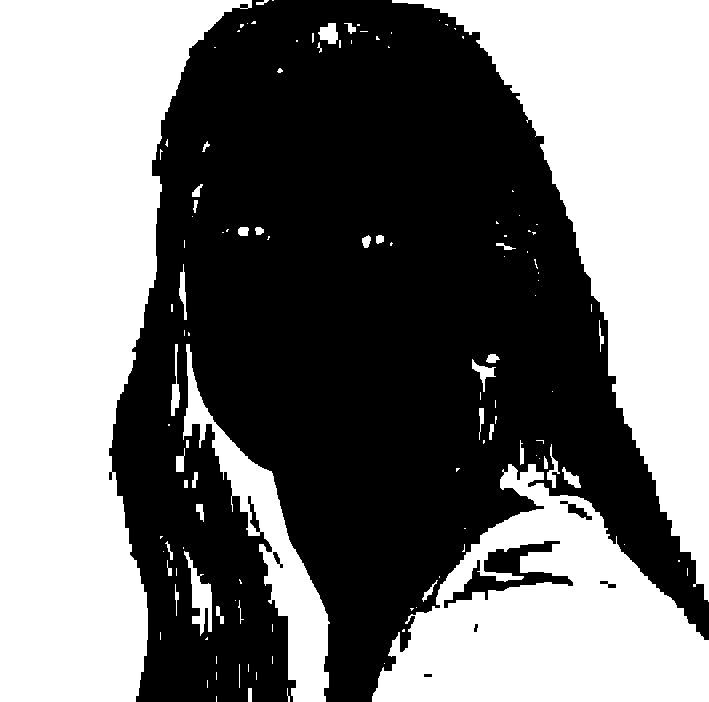

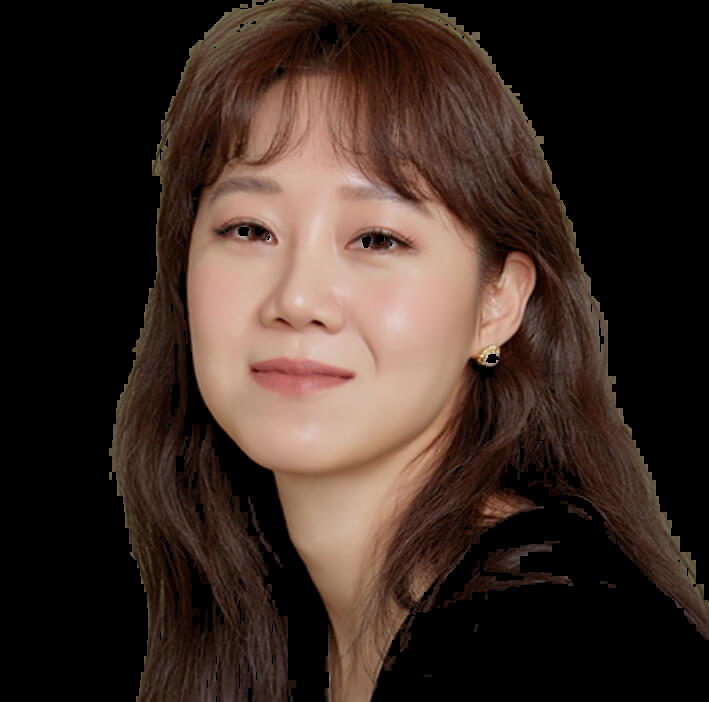

In [ ]:
# Skin Detection
# 낱개의 이미지를 바로 시각화하여 볼 수 있는 코드
from google.colab.patches import cv2_imshow
import cv2

img_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜/공효진.jpg"
#Open a simple image
img=cv2.imread(img_path)

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

YCrCb_result = cv2.bitwise_not(YCrCb_mask)

# Extract the skin regions from the original image
YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

#show results
cv2_imshow(YCrCb_result)
#cv2_imshow(img_YCrCb)
cv2_imshow(YCrCb_skin_detected)

In [ ]:
def convert_skinimg(image):
  img = cv2.imread(image) # 함수로 라벨 반환 시 사용
  # img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 함수로 라벨 반환 시 주석처리
  img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

  YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
  YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

  YCrCb_result = cv2.bitwise_not(YCrCb_mask)

  YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

  # result = cv2_imshow(YCrCb_skin_detected)
  return YCrCb_skin_detected

In [ ]:
def classify_skin_image(image):
    image = convert_skinimg(image)
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    return f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

In [ ]:
warm_file_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/웜"

def skin_process_file(file_path):
    result = classify_skin_image(file_path)
    return result

file_results_warm_2 = {}

for filename in os.listdir(warm_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(warm_file_path, filename)
        result = skin_process_file(file_path)
        file_results_warm_2[filename] = result

# Print the results
for filename, result in file_results_warm_2.items():
    print(f"Result for file {filename}: {result}")

<ipython-input-12-3b249918057d>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-12-3b249918057d>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-12-3b249918057d>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-12-3b249918057d>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


Result for file 한지민.jpg: 봄 웜톤: 9.05%
여름 쿨톤: 28.18%
가을 웜톤: 0.01%
겨울 쿨톤: 62.77%
Result for file 수지.jpg: 봄 웜톤: 8.50%
여름 쿨톤: 52.89%
가을 웜톤: 0.00%
겨울 쿨톤: 38.61%
Result for file 장나라.jpg: 봄 웜톤: 1.12%
여름 쿨톤: 54.04%
가을 웜톤: 0.00%
겨울 쿨톤: 44.84%
Result for file 송혜교.jpg: 봄 웜톤: 3.51%
여름 쿨톤: 73.24%
가을 웜톤: 0.39%
겨울 쿨톤: 22.86%
Result for file 제니.jpg: 봄 웜톤: 3.07%
여름 쿨톤: 62.00%
가을 웜톤: 0.12%
겨울 쿨톤: 34.81%
Result for file 김유정.jpg: 봄 웜톤: 0.66%
여름 쿨톤: 39.82%
가을 웜톤: 0.00%
겨울 쿨톤: 59.52%
Result for file 아이유.jpg: 봄 웜톤: 0.91%
여름 쿨톤: 62.26%
가을 웜톤: 0.00%
겨울 쿨톤: 36.83%
Result for file 수애.jpg: 봄 웜톤: 16.13%
여름 쿨톤: 42.51%
가을 웜톤: 0.00%
겨울 쿨톤: 41.36%
Result for file 전지현.jpg: 봄 웜톤: 25.08%
여름 쿨톤: 26.51%
가을 웜톤: 0.05%
겨울 쿨톤: 48.37%
Result for file 한예슬.jpg: 봄 웜톤: 11.44%
여름 쿨톤: 30.82%
가을 웜톤: 0.00%
겨울 쿨톤: 57.74%
Result for file 신세경.jpg: 봄 웜톤: 9.96%
여름 쿨톤: 72.28%
가을 웜톤: 0.00%
겨울 쿨톤: 17.76%
Result for file 문가영.jpg: 봄 웜톤: 11.75%
여름 쿨톤: 35.09%
가을 웜톤: 0.27%
겨울 쿨톤: 52.89%
Result for file 

In [ ]:
cool_file_path= "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/four_seasons/쿨"
file_results_cool_2 = {}

for filename in os.listdir(cool_file_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(cool_file_path, filename)
        result = skin_process_file(file_path)
        file_results_cool_2[filename] = result

# Print the results
for filename, result in file_results_cool_2.items():
    print(f"Result for file {filename}: {result}")

- 원본 이미지보다 분류 정확도가 떨어진다. 왜지..?

---
### Gradio

In [ ]:
def gr_convert_skinimg(image):
  img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

  YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
  YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

  YCrCb_result = cv2.bitwise_not(YCrCb_mask)

  YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

  # result = cv2_imshow(YCrCb_skin_detected)
  return YCrCb_skin_detected

In [ ]:
def gr_classify_skin_image(image):
    image = gr_convert_skinimg(image)
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    return f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

In [ ]:
# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=gr_classify_skin_image,
    inputs="image",
    outputs="label",
    capture_session=True,
    title="봄여름가을겨울",
    description="사진을 업로드 하면 퍼스널컬러의 비율을 확인할 수 있습니다."
                      )

iface.launch(share=True)

# 이미지 라벨링

In [ ]:
# 디렉토리 형태로 원본 이미지와 라벨 연결
# size는 (224, 224) 로 통일

In [17]:
spring_tone = [253.75, 153.55, 152]
summer_tone = [254, 291.25, 164.5]
fall_tone = [240.75, 199.25, 132.75]
winter_tone = [240, 201.5, 129.5]

def zero_shot_classification(color_vector):
    spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
    summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
    fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
    winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))

    if spring_similarity > summer_similarity and spring_similarity > fall_similarity and spring_similarity > winter_similarity:
        return "봄 웜톤"
    elif summer_similarity > spring_similarity and summer_similarity > fall_similarity and summer_similarity > winter_similarity:
        return "여름 쿨톤"
    elif fall_similarity > spring_similarity and fall_similarity > summer_similarity and fall_similarity > winter_similarity:
        return "가을 웜톤"
    else:
        return "겨울 쿨톤"

In [13]:
def classify_image(image):
    image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    # spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    # summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    # fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    # winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    # all_color = f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"

    spring_tone_ratio = round(spring_tone_ratio / ratio_sum * 100, 2)
    summer_tone_ratio = round(summer_tone_ratio / ratio_sum * 100, 2)
    fall_tone_ratio = round(fall_tone_ratio / ratio_sum * 100, 2)
    winter_tone_ratio = round(winter_tone_ratio / ratio_sum * 100, 2)

    return spring_tone_ratio, summer_tone_ratio, fall_tone_ratio, winter_tone_ratio

In [19]:
classify_image('/content/drive/MyDrive/Colab Notebooks/AIFFEL/Four_seasons/사계절_연예인 이미지 데이터셋/train data/F0019_IND_GM_70_0_05.JPG')

(10.77, 89.19, 0.04, 0.0)

In [20]:
import cv2
import numpy as np
import os
import shutil

def classify_and_save_to_subfolders(input_dir):
    spring_dir = os.path.join(input_dir, "봄 웜톤")
    summer_dir = os.path.join(input_dir, "여름 쿨톤")
    fall_dir = os.path.join(input_dir, "가을 웜톤")
    winter_dir = os.path.join(input_dir, "겨울 쿨톤")

    for dir_path in [spring_dir, summer_dir, fall_dir, winter_dir]:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)

            if image_path in [os.path.join(spring_dir, filename),
                              os.path.join(summer_dir, filename),
                              os.path.join(fall_dir, filename),
                              os.path.join(winter_dir, filename)]:
                continue

            spring_ratio, summer_ratio, fall_ratio, winter_ratio = classify_image(image_path)
            print(spring_ratio, summer_ratio, fall_ratio, winter_ratio)

            max_ratio = max(spring_ratio, summer_ratio, fall_ratio, winter_ratio)
            print(max_ratio)

            if max_ratio == spring_ratio:
                class_dir = spring_dir
            elif max_ratio == summer_ratio:
                class_dir = summer_dir
            elif max_ratio == fall_ratio:
                class_dir = fall_dir
            else:
                class_dir = winter_dir

            shutil.move(image_path, class_dir)

            print(f"Image '{filename}' moved to class directory '{os.path.basename(class_dir)}'.")

if __name__ == "__main__":
    input_directory = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Four_seasons/사계절_연예인 이미지 데이터셋/train data"
    classify_and_save_to_subfolders(input_directory)

1.05 97.28 1.67 0.0
97.28
Image 'F0042_IND_D_16_0_01.jpg' moved to class directory '여름 쿨톤'.
4.32 92.63 3.05 0.0
92.63
Image 'F0044_IND_D_32_0_03.jpg' moved to class directory '여름 쿨톤'.


- 왜 두 개 밖에 이동이 안되는거지..?